In [35]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble
import time

In [2]:
lfw=datasets.fetch_lfw_people(min_faces_per_person=100, resize=0.4)

In [3]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [4]:
lfw.data.shape

(1140, 1850)

In [5]:
lfw.images.shape

(1140, 50, 37)

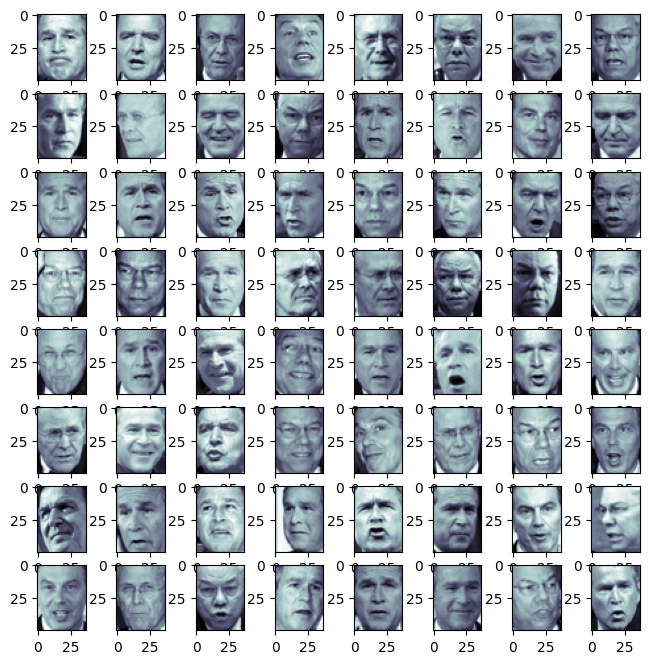

In [6]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
  ax=fig.add_subplot(8,8,i+1)
  ax.imshow(lfw.images[i],cmap=plt.cm.bone)
plt.show()

In [23]:
x = lfw.data
y=lfw.target
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
pca_lfw = PCA()
pca_lfw.fit(x_train)

PCA()

In [12]:
k = 0
total=0

while total<0.99:
  total+=pca_lfw.explained_variance_ratio_[k]
  k=k+1
k

398

In [26]:
pca_lfw = PCA(n_components=k , whiten=True)
x_transformed = pca_lfw.fit_transform(x_train)
x_transformed.shape

(855, 398)

In [29]:
x_approx = pca_lfw.inverse_transform(x_transformed)
x_approx = x_approx.reshape((855,50,37))

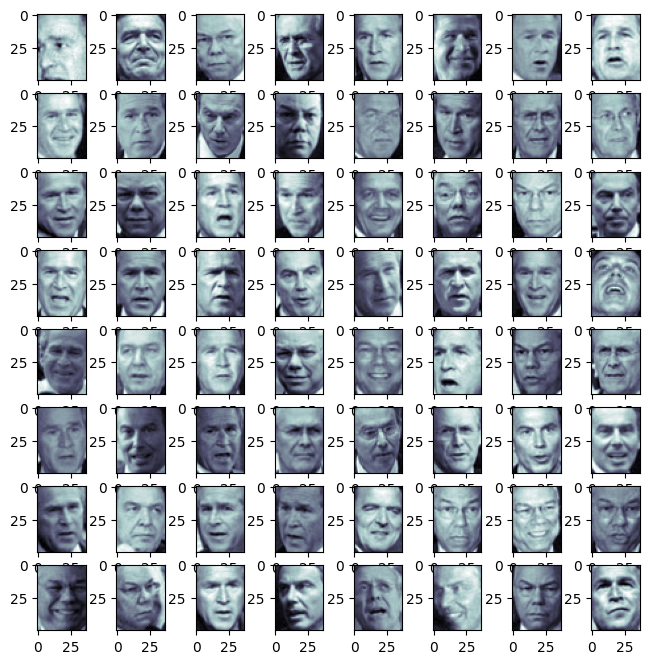

In [31]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
  ax=fig.add_subplot(8,8,i+1)
  ax.imshow(x_approx[i],cmap=plt.cm.bone)
plt.show()

In [32]:
pca_lfw.components_.shape
eigenv=pca_lfw.components_.reshape(k,50,37)

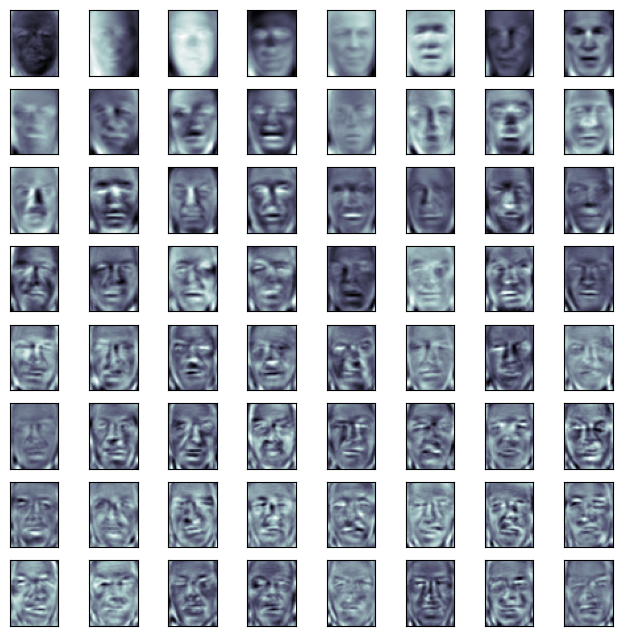

In [33]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
  ax=fig.add_subplot(8,8,i+1,xticks= [],yticks=[])
  ax.imshow(eigenv[i],cmap=plt.cm.bone)
plt.show()

In [34]:
x_train_pca = x_transformed
x_test_pca = pca_lfw.transform(x_test)

In [38]:
rf  = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train,y_train)
print(time.time() - start)
y_pred =rf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

3.1197173595428467
              precision    recall  f1-score   support

           0       0.83      0.72      0.77        61
           1       0.75      0.25      0.38        36
           2       0.61      0.98      0.75       122
           3       1.00      0.16      0.28        31
           4       0.83      0.43      0.57        35

    accuracy                           0.68       285
   macro avg       0.80      0.51      0.55       285
weighted avg       0.74      0.68      0.63       285

[[ 44   1  16   0   0]
 [  6   9  20   0   1]
 [  2   0 120   0   0]
 [  0   1  23   5   2]
 [  1   1  18   0  15]]


In [39]:
rf  = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train_pca,y_train)
print(time.time() - start)
y_pred =rf.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

ValueError: ignored